In [ ]:
from skimage import data,io,color,exposure
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Image:
  import numpy as np
  def __init__(self,data: np.ndarray):
    self.data = data
    self.height = data.shape[0]
    self.width = data.shape[1]
    self.datatype = data.dtype

  def is_grayscale(self):
    return len(self.data.shape)==2

  def imshow(self):
    import matplotlib.pyplot as plt
    if (self.is_grayscale()):
      plt.imshow(self.data, cmap="gray")

  def histogram(self,intensity_resolution=8,normalize=False):
    import numpy as np
    if(self.is_grayscale()):
      bins = np.arange(0,2**intensity_resolution,1)
      hist = np.zeros_like(bins) #np.zeros(2**intensity_resolution)
      for i in range(self.height):
        for j in range(self.width):
          hist[self.data[i,j]] = hist[self.data[i,j]]+1
      if(normalize):
        hist = hist/(self.height*self.width)
    return bins,hist

  # def plot_histogram(self,intensity_resolution=8,normalize=False):
  #   import matplotlib.pyplot as plt
  #   bins,hist = self.histogram(intensity_resolution=intensity_resolution,normalize=normalize)
  #   plt.plot(bins,hist)

  def plot_histogram(self,nbins=256,normalize=False,plot_cdf=True):
    hist, bins_hist = exposure.histogram(self.data.ravel(),nbins=nbins,normalize=normalize)
    plt.plot(bins_hist,hist,"k")
    plt.xlabel("pixel_values")
    if normalize:
      plt.ylabel("probability")
    else:
      plt.ylabel("count")
    xmax = 1 if self.data.max()<= 1 else 255
    plt.xlim([0,xmax])

    if plot_cdf:
      cdf,bins_cdf = exposure.cumulative_distribution(self.data.ravel(),nbins=nbins)
      plt.twinx()
      plt.plot(bins_cdf,cdf,"r",lw=3)
      plt.ylabel("percentage")


  def plot_img_and_hist(self,nbins=256,normalize=False,plot_cdf=True):
    plt.subplot(2,1,1)
    io.imshow(self.data)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2,1,2)
    self.plot_histogram(nbins=nbins,normalize=normalize,plot_cdf=plot_cdf)
    plt.title("histogram")


  def plot_histogram_color(self,nbins=256,normalize=False):
    color=["r","g","b"]
    for i in range(3):
      hist, bins_hist = exposure.histogram(self.data[:,:,i].ravel(),nbins=nbins,normalize=normalize)
      plt.plot(bins_hist,hist,color[i])

    plt.xlabel("pixel_values")
    if normalize:
      plt.ylabel("probability")
    else:
      plt.ylabel("count")
    xmax = 1 if self.data.max()<= 1 else 255
    plt.xlim([0,xmax])
    plt.legend(["Red Channel","Green Channel","Blue Channel"])


  def plot_img_and_hist_color(self,nbins=256,normalize=False):
    plt.subplot(2,1,1)
    io.imshow(self.data)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2,1,2)
    self.plot_histogram_color(nbins=nbins,normalize=normalize)
    plt.title("histogram")

  def hist_eq_gray(self,nbins=256,window=(30,30),clip_limit=0.01,normal_he=True):
    if normal_he:
      data_eq = exposure.equalize_hist(self.data/255,nbins=nbins)
    else:
      data_eq= exposure.equalize_adapthist(self.data/255,kernel_size=window,clip_limit=clip_limit,nbins=nbins)
    return data_eq




  def cumulative_histogram(self,intensity_resolution=8,normalize=False):
    import numpy as np
    bins,hist=self.histogram(intensity_resolution=intensity_resolution,normalize=normalize)
    cumulative_hist= np.zeros_like(bins)
    cumulative_hist[0]=hist[0]
    for i in range(1,len(hist)):
      cumulative_hist[i]=cumulative_hist[i-1]+hist[i]
    return bins, cumulative_hist

  def plot_cumulative_histogram(self,intensity_resolution=8,normalize=False):
    import matplotlib.pyplot as plt
    bins,hist = self.cumulative_histogram(intensity_resolution=intensity_resolution,normalize=normalize)
    plt.plot(bins,hist)

  def contrast_stretching(self,intensity_resolution=8,normalize=False):
    import numpy as np
    r=self.data/255
    H=np.max(self.data/255)
    L=np.min(self.data/255)
    S=(((1/(H-L))*(r-L))*255).astype(np.uint8)

    return Image(S)

  def power_transform(self,gamma):
    import numpy as np
    r=self.data/255
    r=r**gamma
    c=np.max(r)
    S=r/c

    return Image(S)

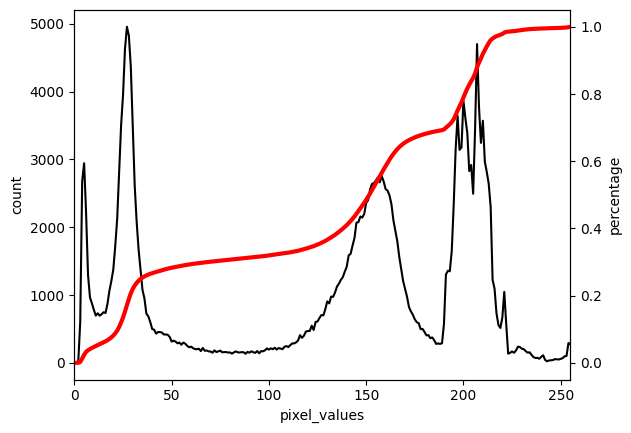

In [ ]:
I_gray= data.camera()
img_gray = Image(I_gray)
img_gray.plot_histogram()

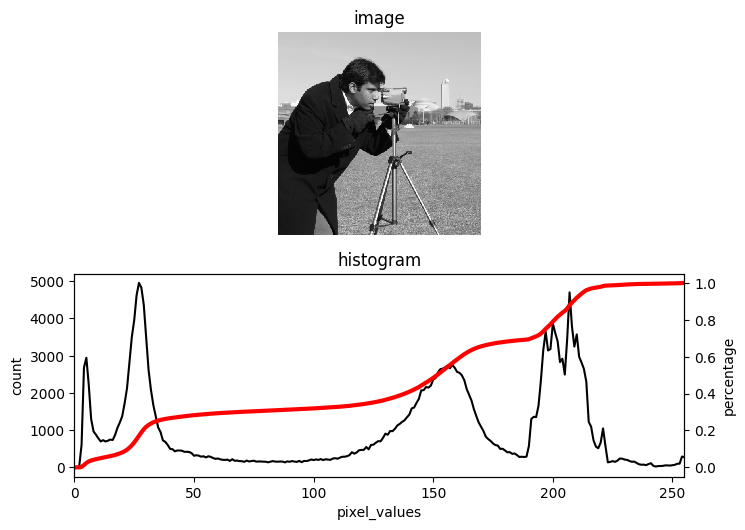

In [ ]:
I_gray= data.camera()
img_gray = Image(I_gray)
img_gray.plot_img_and_hist()

In [ ]:
def plot_histogram_color(self,nbins=256,normalize=False):
    color=["r","g","b"]
    for i in range(3):
      hist, bins_hist = exposure.histogram(self.data[:,:,i].ravel(),nbins=nbins,normalize=normalize)
      plt.plot(bins_hist,hist,color[i])

    plt.xlabel("pixel_values")
    if normalize:
      plt.ylabel("probability")
    else:
      plt.ylabel("count")
    xmax = 1 if self.data.max()<= 1 else 255
    plt.xlim([0,xmax])
    plt.legend(["Red Channel","Green Channel","Blue Channel"])


def plot_img_and_hist_color(self,nbins=256,normalize=False):
    plt.subplot(2,1,1)
    io.imshow(self.data)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2,1,2)
    self.plot_histogram_color(nbins=nbins,normalize=normalize)
    plt.title("histogram")




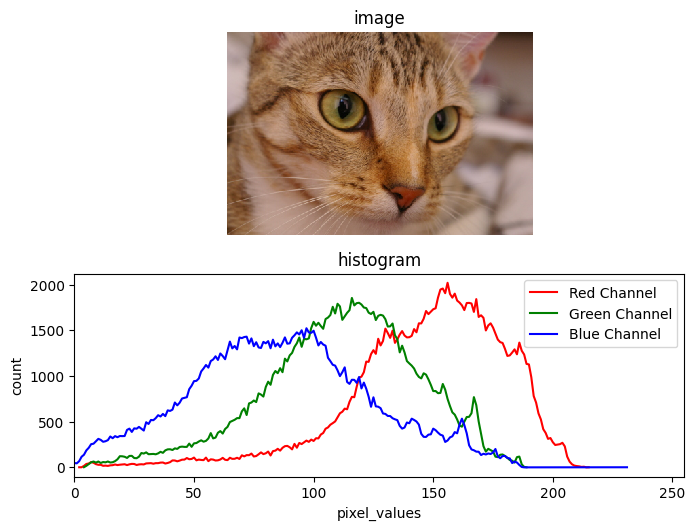

In [ ]:
I_color= data.cat()
img_color = Image(I_color)
img_color.plot_img_and_hist_color()

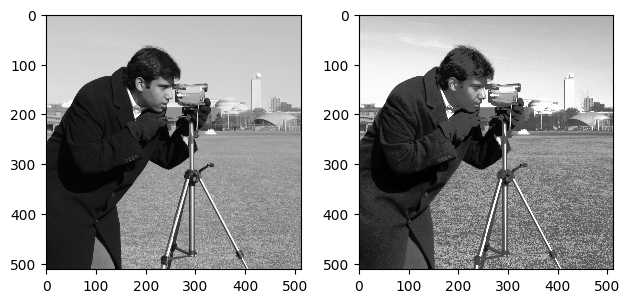

In [ ]:
I_gray_norm=I_gray/255
I_gray_norm_eq= exposure.equalize_hist(I_gray_norm,nbins=256)
plt.subplot(1,2,1)
io.imshow(I_gray_norm)
plt.subplot(1,2,2)
io.imshow(I_gray_norm_eq)

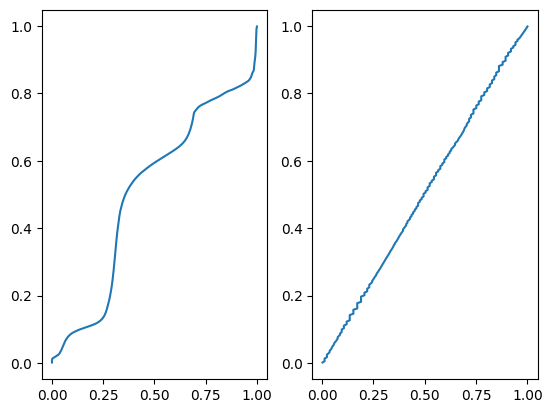

In [ ]:
x_gray,I_gray_hist=exposure.cumulative_distribution(I_gray_norm.ravel(),nbins=256)
x_eq,I_gray_eq_hist=exposure.cumulative_distribution(I_gray_norm_eq.ravel(),nbins=256)
plt.subplot(1,2,1)
plt.plot(x_gray,I_gray_hist)
plt.subplot(1,2,2)
plt.plot(x_eq,I_gray_eq_hist)

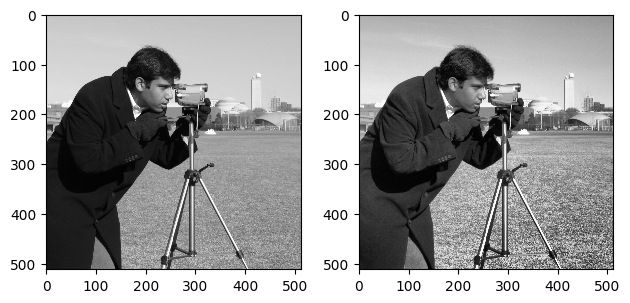

In [ ]:
I_gray_norm=I_gray/255
I_gray_norm_eq= exposure.equalize_adapthist(I_gray_norm,kernel_size= (200,200), clip_limit=0.01, nbins=256)
plt.subplot(1,2,1)
io.imshow(I_gray_norm)
plt.subplot(1,2,2)
io.imshow(I_gray_norm_eq)

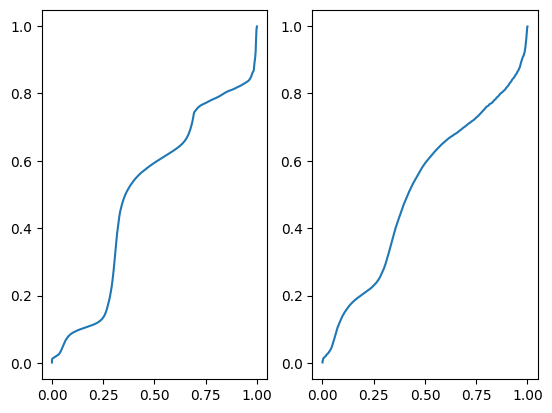

In [ ]:
x_gray,I_gray_hist=exposure.cumulative_distribution(I_gray_norm.ravel(),nbins=256)
x_eq,I_gray_eq_hist=exposure.cumulative_distribution(I_gray_norm_eq.ravel(),nbins=256)
plt.subplot(1,2,1)
plt.plot(x_gray,I_gray_hist)
plt.subplot(1,2,2)
plt.plot(x_eq,I_gray_eq_hist)

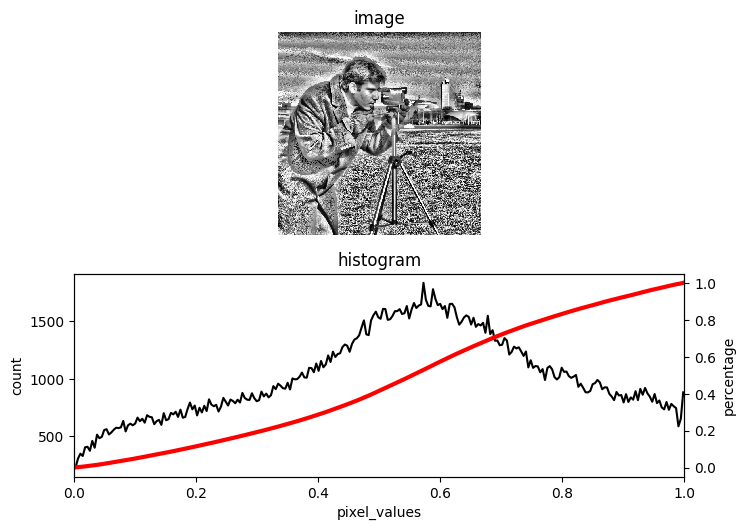

In [ ]:
I_gray_eq= img_gray.hist_eq_gray(normal_he=False,clip_limit=0)
img_gray_eq=Image(I_gray_eq)
img_gray_eq.plot_img_and_hist()

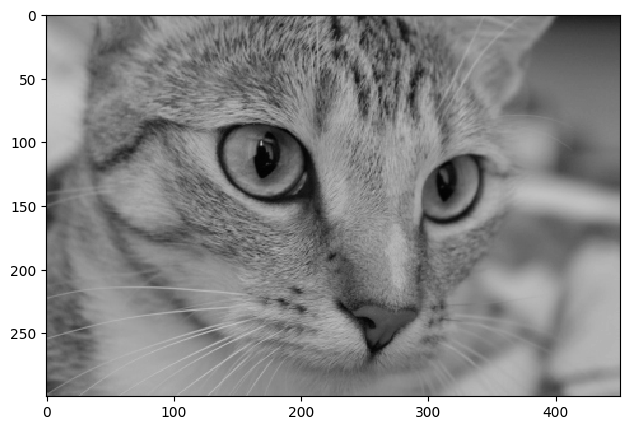

In [ ]:
I_color=data.cat()
I_color_lab=color.rgb2lab(I_color)
io.imshow(I_color_lab[:,:,0]/100)
I_color_lab[:,:,0]=I_color_lab[:,:,0]/100
I_color_lab_eq = exposure.equalize_adapthist(I_color_lab[:,:,0],kernel_size=(100,100),clip_limit=0.01,nbins=256)

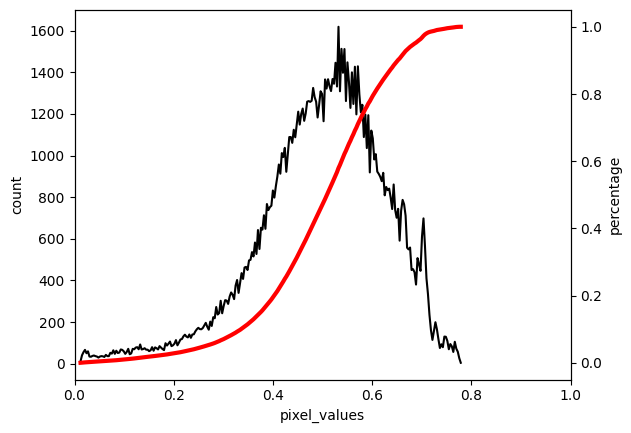

In [ ]:
img_lab = Image(I_color_lab[:,:,0])
img_lab.plot_histogram()

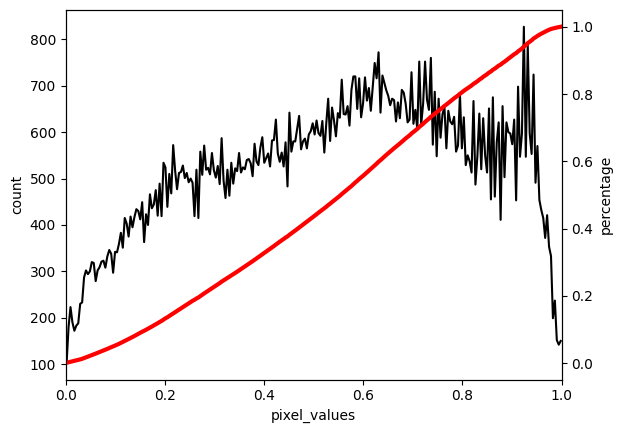

In [ ]:
img_lab_eq= Image(I_color_lab_eq)
img_lab_eq.plot_histogram()

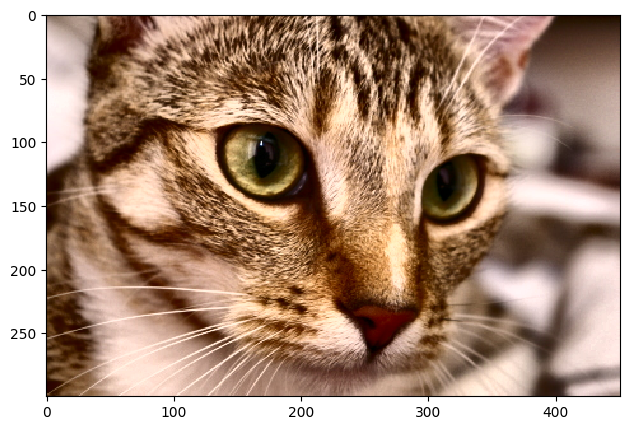

In [ ]:
I_color_lab[:,:,0]= I_color_lab_eq*100
I_color_recon = color.lab2rgb(I_color_lab)
io.imshow(I_color_recon)